![Adelie Penguin ready to engage in his final semester](penguin-header.jpg)

# Introduction
Let's take a journey together! This is the first blog post in a series of exciting projects that I will be working on in my CSCI415 class. This class is focused on Machine Learning Theory, Implementation, Understanding the package environment within Python, Experimentation, and Social Responsibility. These Blog Posts are here to help me think critically of my work in this class, and reflect on work. 

In this assignment, we are going to try to differentiate Penguin Species by various characteristics. Our work flow will be as follows:  
- Load in data  
- Explore the data graphically and tabularly  
- Create a repeatable way to find the top characteristics  
- Observe our results with a decision region plot   
- Cross-validate to ensure we are not overfitting our data  

### Below begins our journey

## Loading in Data 
We are going to load in our training data for this project from a github url 

In [2]:
import pandas as pd 
train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

Now we are going to take a look at our data and look for some potentially interesting features. My goal hear is to do some exploration through graphs and a bit of intuition to see if there are any key features that stick out to me. 

In [3]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


Following this, I made a rather arbitrary guess to take a look at the culmen depth and culmen length. I combined this  with a hue to see the species as well as whether clutches were completed just to have a large range of variables potentially explored by this graph.

Text(0.5, 1.0, 'Culmen Length and Culmen Depth of Chinstrap, Gentoo, and Adelie Penguins')

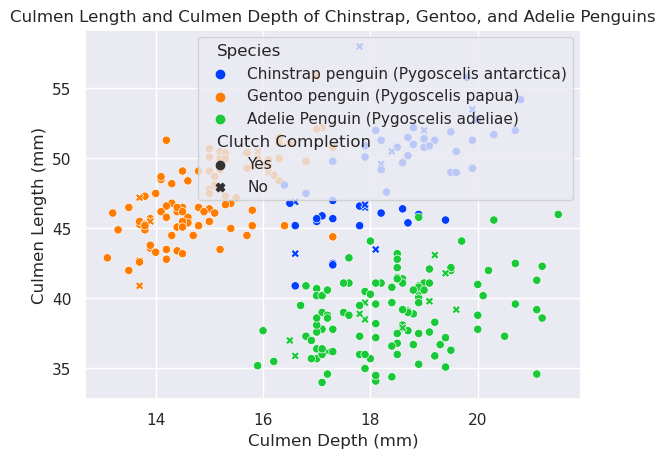

In [5]:
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set_theme(palette="bright")

#sns.scatterplot(data=train, x="Flipper Length (mm)", y="Body Mass (g)", hue="Culmen Depth (mm)", style="Clutch Completion")

sns.scatterplot(data=train, x="Culmen Depth (mm)", y="Culmen Length (mm)", hue="Species", style="Clutch Completion").set_title("Culmen Length and Culmen Depth of Chinstrap, Gentoo, and Adelie Penguins")

Following this, I created a graph that showed the variation in Delta 13 temperature across the three different islands. I had an intuition that Islands might be used in the key features for my function and thuse wanted to explore this graphically.

/home/manny/anaconda3/envs/ml-0451/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


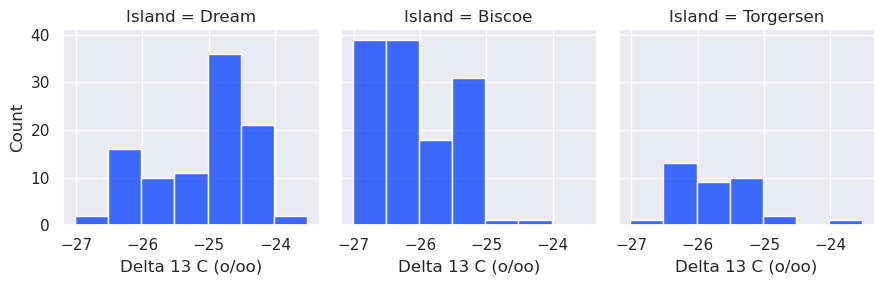

In [7]:
sns.displot(train, x="Delta 13 C (o/oo)", col="Island", binwidth=.5, height=3)

In [8]:
beautiful_table = train.groupby(["Species", "Island"]).aggregate({"Body Mass (g)" : ('mean') ,"Culmen Depth (mm)" : ('mean'), "Flipper Length (mm)": ('mean'), "Delta 15 N (o/oo)" :('mean')})
beautiful_table

Body Mass (g)  \
Species                                   Island                     
Adelie Penguin (Pygoscelis adeliae)       Biscoe       3711.363636   
                                          Dream        3728.888889   
                                          Torgersen    3712.804878   
Chinstrap penguin (Pygoscelis antarctica) Dream        3743.421053   
Gentoo penguin (Pygoscelis papua)         Biscoe       5039.948454   

                                                     Culmen Depth (mm)  \
Species                                   Island                         
Adelie Penguin (Pygoscelis adeliae)       Biscoe             18.475758   
                                          Dream              18.306667   
                                          Torgersen          18.468293   
Chinstrap penguin (Pygoscelis antarctica) Dream              18.366667   
Gentoo penguin (Pygoscelis papua)         Biscoe             14.914433   

                                                     Flipper Length (mm)  \
Species                                   Island                           
Adelie Penguin (Pygoscelis adeliae)       Biscoe              188.636364   
                                          Dream               190.133333   
                                          Torgersen           191.195122   
Chinstrap penguin (Pygoscelis antarctica) Dream               196.000000   
Gentoo penguin (Pygoscelis papua)         Biscoe              216.752577   

                                                     Delta 15 N (o/oo)  
Species                                   Island                        
Adelie Penguin (Pygoscelis adeliae)       Biscoe              8.788643  
                                          Dream               8.933945  
                                          Torgersen           8.846768  
Chinstrap penguin (Pygoscelis antarctica) Dream               9.331004  
Gentoo penguin (Pygoscelis papua)         Biscoe              8.247341

After exploration, I can see that average Flipper Length and Delta 15 N differentiate between the species. I can also see how both the Chinstrap and Gentoo penguin only appear on one island each. While I believe these features might be key features, I am going to take a brute-force approach at finding the correct features by trying every possible combination of approaches.

## Organizing Data 

Following this graphical exploration, I need to use the LabelEncoder. The LabelEncoder is going to set increasingly large numbers starting from 0 to replace each label. For all other qualitative columns, they are are turned into 1's and 0's so that we can run our models on it.

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df) #here is where we set all non-integer values to integers
  return df, y

X_train, y_train = prepare_data(train)

## Lets use a more comprehensive search for choosing features! 
Because our dataset is relatively smaller, we can use an exhaustive search for all the features contained in the dataset. 
This means we are going to look at every combination of qualitative columns with quantitative columns and then create a model on this. Following this we calculate an estimated score which we add to a dictionary of ratings.

In [95]:
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

LR = LogisticRegression()

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex", "Island"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
ratings = {}
for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    # you could train models and score them here, keeping the list of 
    cols = qual_cols + list(pair) 
    LR.fit(X_train[cols], y_train)
    #cv_scores_LR = cross_val_score(LR, X_train, y_train, cv=3)

    estimated_score = LR.score(X_train[cols], y_train) 
    #estimated_score = cv_scores_LR.mean()
    ratings[" ".join(cols)] = estimated_score 


We now have a dictionary of items that should tell us our highest scored combination

In [96]:
top_result = max(ratings, key=ratings.get)
top_result 

'Sex_FEMALE Sex_MALE Culmen Length (mm) Culmen Depth (mm)'

We are going to move our qualitative values to the end of our list because of our decision regions function we have later on

In [97]:
#top_result= ["Culmen Length (mm)", "Culmen Depth (mm)", "Clutch Completion_No", "Clutch Completion_Yes"]
top_result= ["Culmen Length (mm)", "Culmen Depth (mm)", "Sex_FEMALE", "Sex_MALE"]

In [98]:
LR.fit(X_train[top_result], y_train)
LR.score(X_train[top_result], y_train)

0.99609375

## Plotting Decisions Regions 
Wow! Our rating is pretty high. Lets visualize what our model is doing by plotting Decisions Regions 

In [99]:
from matplotlib import pyplot as plt
import numpy as np

In [100]:

from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

     Culmen Length (mm)  Culmen Depth (mm)  Sex_FEMALE  Sex_MALE
0                  40.9               16.6        True     False
1                  49.0               19.5       False      True
2                  50.0               15.2       False      True
3                  45.8               14.6        True     False
4                  51.0               18.8       False      True
..                  ...                ...         ...       ...
270                51.1               16.5       False      True
271                35.9               16.6        True     False
272                39.5               17.8        True     False
273                36.7               19.3        True     False
274                42.4               17.3        True     False

[256 rows x 4 columns] [1 1 2 2 1 0 0 1 2 1 0 1 0 1 1 2 0 2 2 2 2 0 0 0 2 1 0 0 0 0 0 0 1 2 0 0 2
 2 1 1 2 2 1 0 0 2 2 1 2 2 1 2 0 0 2 2 0 1 2 2 1 2 1 2 2 2 0 0 0 2 2 2 0 1
 2 2 2 0 0 2 0 0 2 0 0 0 1 0 0 1 0 0 0 1 0 0 2

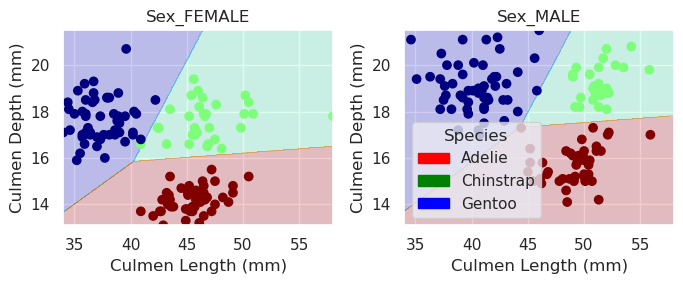

In [101]:
print(X_train[top_result], y_train)

plot_regions(LR, X_train[top_result], y_train)

## Cross Validation 
We want to calculate how our model will do on unseen data, and a useful way to simulate this is by performing cross-validation. We can take parts of the train data from being used, and then testing on those witheld parts, we can determine our accuracy.

In [102]:
from sklearn.model_selection import cross_val_score

cv_scores_LR = cross_val_score(LR, X_train, y_train, cv=5)
cv_scores_LR.mean()

1.0

## We did it! 

### Next Steps 
This would involve testing other models such as Decision Classfier Trees, and we could run the cross validation step within our brute-force attempt instead of after.